In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# EDA

## 0.PassengerId

In [5]:
df['PassengerId'].nunique()

8693

In [6]:
df = df.drop('PassengerId',axis=1)


### 1.HomePlanet

In [7]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
df['HomePlanet'].isnull().sum()

201

In [9]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace=True)

In [10]:
df['HomePlanet'].isnull().sum()

0

In [11]:
df['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

### 2.CryoSleep

In [12]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0],inplace=True)

### 3.Cabin

In [14]:
df['Cabin'].nunique()

6560

In [15]:
df.drop('Cabin',axis = 1,inplace = True)

### 4.Destination

In [16]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [17]:
# converted into 0 and 1 by using ONE HOT Encoding

### 5.Age

In [18]:
df['Age'].nunique()

80

In [19]:
df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [20]:
df['Age'].isnull().sum()

179

In [21]:
df['Age'] =df['Age'].fillna(df['Age'].mode()[0])

### 6.VIP

In [22]:
df['VIP']

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

In [23]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [24]:
df['VIP']= df['VIP'].fillna(df['VIP'].mode()[0])

In [25]:
df['VIP'].replace({False: 0, True: 1},inplace = True)

In [26]:
df['VIP'].isnull().sum()

0

In [27]:
df['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 8693, dtype: int64

### 7.RoomService

In [28]:
df['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [29]:
df['RoomService'].nunique()

1273

In [30]:
df['RoomService'].head()

0      0.0
1    109.0
2     43.0
3      0.0
4    303.0
Name: RoomService, dtype: float64

In [31]:
df['RoomService'].isnull().sum()

181

In [32]:
df['RoomService']= df['RoomService'].fillna(df['RoomService'].mode()[0])

In [33]:
df['RoomService'].isnull().sum()

0

### 8.FoodCourt

In [34]:
df['FoodCourt']

0          0.0
1          9.0
2       3576.0
3       1283.0
4         70.0
         ...  
8688    6819.0
8689       0.0
8690       0.0
8691    1049.0
8692    4688.0
Name: FoodCourt, Length: 8693, dtype: float64

In [35]:
df['FoodCourt'].value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [36]:
df['FoodCourt'].nunique()

1507

In [37]:
df['FoodCourt'].isnull().sum()

183

In [38]:
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median())

### 9.ShoppingMall

In [39]:
df['ShoppingMall'].value_counts()

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [40]:
df['ShoppingMall'].nunique()

1115

In [41]:
df['ShoppingMall'].isnull().sum()

208

In [42]:
df['ShoppingMall']=df['ShoppingMall'].fillna(df['ShoppingMall'].median())

### 10.SPA

In [43]:
df['Spa']


0          0.0
1        549.0
2       6715.0
3       3329.0
4        565.0
         ...  
8688    1643.0
8689       0.0
8690       1.0
8691     353.0
8692       0.0
Name: Spa, Length: 8693, dtype: float64

In [44]:
df['Spa'].isnull().sum()

183

In [45]:
df['Spa']=df['Spa'].fillna(df['Spa'].median())

### 11.VRDeck

In [46]:
df['VRDeck']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [47]:
df['VRDeck'].value_counts()

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64

In [48]:
df['VRDeck'].nunique()

1306

In [49]:
df['VRDeck'].isnull().sum()

188

In [50]:
df['VRDeck'].fillna(df['VRDeck'].median(),inplace=True)

### 12.Name

In [51]:
df.drop('Name',axis = 1,inplace = True)

### 13.Transported 

In [52]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [53]:
df['Transported'].isnull().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8511 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


In [55]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

# Feature Engineering

### Label Encoding

In [56]:
df['HomePlanet'].value_counts().to_dict()

{'Earth': 4803, 'Europa': 2131, 'Mars': 1759}

In [57]:
df['HomePlanet'].replace({'Earth': 3, 'Europa': 2, 'Mars': 1},inplace =True)

In [58]:
df['CryoSleep'].value_counts().to_dict()

{False: 5656, True: 3037}

In [59]:
df['HomePlanet'].replace({"False": 0, "True": 1},inplace =True)

In [60]:
df['CryoSleep']=df['CryoSleep'].astype(int)

In [61]:
df['VIP'].value_counts().to_dict()

{0: 8494, 1: 199}

In [62]:
df['VIP'].replace({False: 0, True: 1},inplace = True)

In [63]:
df['VIP']=df['VIP'].astype(int)

In [64]:
df['Transported'].value_counts().to_dict()

{True: 4378, False: 4315}

In [65]:
df['Transported'].replace({True: 1, False: 0},inplace=True)

### One hot Encoding

In [66]:
df = pd.get_dummies(df,columns=["Destination"],drop_first=True)


In [67]:
df

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,2,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,3,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,1
2,2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,2,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,3,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0
8689,3,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
8690,3,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,1
8691,2,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0


# Feature Scaling and Data Extraction

In [68]:
df.corr()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
HomePlanet,1.000000,-0.083586,-0.132972,-0.123512,-0.211751,-0.071454,-0.101383,-0.055047,-0.039824,-0.115461,0.200780,-0.091598
CryoSleep,-0.083586,1.000000,-0.072235,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,0.087764,-0.103213
Age,-0.132972,-0.072235,1.000000,0.092271,0.068915,0.127376,0.033619,0.120655,0.099583,-0.074153,-0.027894,-0.001550
VIP,-0.123512,-0.078281,0.092271,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,-0.000592,-0.035309
RoomService,-0.211751,-0.244089,0.068915,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.063354,0.060684
FoodCourt,-0.071454,-0.205928,0.127376,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.065400,-0.073520
ShoppingMall,-0.101383,-0.207798,0.033619,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.031245,0.033063
Spa,-0.055047,-0.198307,0.120655,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.053303,-0.034497
VRDeck,-0.039824,-0.192721,0.099583,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.044861,-0.047011
Transported,-0.115461,0.460132,-0.074153,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.000092,-0.094700


<AxesSubplot: >

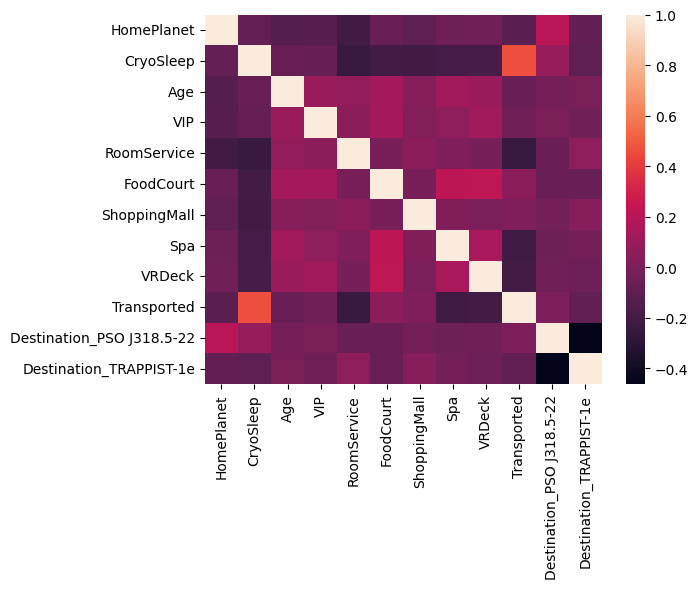

In [69]:
sns.heatmap(df.corr())

In [70]:
plt.show()

# Train Test Split

In [71]:
x = df.drop('Transported',axis=1)
y=df['Transported']

##### Train Test split without scaling

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18,stratify=y)

In [93]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

###### evaluate 

In [74]:
y_pred_train = knn_clf.predict(x_train)

train_acc_1 = accuracy_score(y_train,y_pred_train)
print("Training accuracy without scaling is :- ",train_acc_1)

y_pred_test = knn_clf.predict(x_test)

test_acc_1 = accuracy_score(y_test,y_pred_test)
print("Testing accuracy without scaling is :- ",test_acc_1)

Training accuracy without scaling is :-  0.8206787460454414
Testing accuracy without scaling is :-  0.765382403680276


#### Normalize data

In [75]:
norm = MinMaxScaler()
norm_xtrain = norm.fit_transform(x_train)
norm_df_xtrain = pd.DataFrame(norm_xtrain,columns=x.columns)

norm_xtest = norm.transform(x_test)
norm_df_xtest = pd.DataFrame(norm_xtest,columns = x.columns)

In [76]:
knn_clf_norm = KNeighborsClassifier()
knn_clf_norm.fit(norm_xtrain,y_train)

KNeighborsClassifier()

#### evaluate normalise train and test

In [77]:
y_pred_train2 = knn_clf_norm.predict(norm_df_xtrain)

train_acc_2 = accuracy_score(y_train,y_pred_train)
print("Training accuracy after norm is :- ",train_acc_2)

y_pred_test2 = knn_clf_norm.predict(norm_df_xtest)

test_acc_2 = accuracy_score(y_test,y_pred_test)
print("Testing accuracy after norm  is :- ",test_acc_2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Training accuracy after norm is :-  0.8206787460454414
Testing accuracy after norm  is :-  0.765382403680276


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


#### Standardize data

In [78]:
std = StandardScaler()
std_xtrain = std.fit_transform(x_train)
std_df_xtrain = pd.DataFrame(std_xtrain,columns=x.columns)

std_xtest = std.transform(x_test)
std_df_xtest = pd.DataFrame(std_xtest,columns = x.columns)

In [79]:
knn_clf_std = KNeighborsClassifier()
knn_clf_std.fit(std_df_xtrain,y_train)

KNeighborsClassifier()

#### evaluate 

In [80]:
y_pred_train3 = knn_clf_std.predict(std_df_xtrain)

train_acc_3 = accuracy_score(y_train,y_pred_train)
print("Training accuracy after std is :- ",train_acc_3)

y_pred_test3 = knn_clf_std.predict(std_df_xtest)

test_acc_3 = accuracy_score(y_test,y_pred_test)
print("Testing accuracy after std  is :- ",test_acc_3)

Training accuracy after std is :-  0.8206787460454414
Testing accuracy after std  is :-  0.765382403680276


#  HyperTuning

### GridSearchCV

#### Normalize

In [81]:
hyperparameter_grid = {"p" : [1,2],"n_neighbors" : np.arange(2,30)}

In [82]:
gscv_norm = GridSearchCV(knn_clf_norm,hyperparameter_grid,cv=40)
gscv_norm.fit(norm_df_xtrain,y_train)

GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [83]:
gscv_norm.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [84]:
gscv_norm = gscv_norm.best_estimator_
gscv_norm.fit(norm_df_xtrain,y_train)

KNeighborsClassifier(n_neighbors=13)

#### evaluate GSCV

In [85]:
y_pred_train4 = gscv_norm.predict(norm_df_xtrain)

train_acc_4 = accuracy_score(y_train,y_pred_train)
print("Training accuracy after hyper_norm is :- ",train_acc_4)

y_pred_test4 = gscv_norm.predict(norm_df_xtest)

test_acc_4 = accuracy_score(y_test,y_pred_test)
print("Testing accuracy after hyper_norm  is :- ",test_acc_4)

Training accuracy after hyper_norm is :-  0.8206787460454414
Testing accuracy after hyper_norm  is :-  0.765382403680276


In [86]:
x_test[:5]

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
3177,2,0,31.0,0,0.0,1216.0,0.0,897.0,478.0,0,1
6205,3,0,25.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8345,2,0,26.0,0,0.0,70.0,0.0,41.0,0.0,0,1
7490,3,1,38.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1734,3,0,65.0,0,5.0,317.0,0.0,0.0,123.0,0,1


In [87]:
y_test[:5]

/var/folders/jt/np9jlhmx0_7b2y8kfpdxqbdh0000gn/T/ipykernel_845/1754177261.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:5]


3177    0
6205    1
8345    0
7490    1
1734    0
Name: Transported, dtype: int64

In [88]:
3,1,38,0,0,0,0,0,0,0,1


(3, 1, 38, 0, 0, 0, 0, 0, 0, 0, 1)

In [89]:
df2 = pd.DataFrame([[3,1,38,0,0,0,0,0,0,0,1]])
df2

,0,1,2,3,4,5,6,7,8,9,10
0,3,1,38,0,0,0,0,0,0,0,1


In [90]:
gscv_test = norm.transform(df2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [91]:
y_predict = knn_clf_norm.predict(gscv_test)
y_predict

array([1])

# new test

In [95]:
simple_knn = std.transform(df2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
gscv_std = knn_clf_std.predict(simple_knn)
gscv